In [37]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Reading Data

In [22]:
red = pd.read_csv("../data/winequality-red.csv", sep = ";")
white = pd.read_csv("../data/winequality-white.csv", sep = ";")

In [23]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
wine = pd.concat([red, white], ignore_index = True)

In [26]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Checking for missing values

In [27]:
wine[wine.isna().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


## Saving Data

In [28]:
wine.to_csv("../data/wine.csv", index = False)

## Loading Data

In [29]:
wine = pd.read_csv("../data/wine.csv")

## Data Summary

In [30]:
def dataDescription(data):
    # for column in data.columns:
    #     print(column)
    #     print(data[column].describe()) 
    #     print('\n')
    display(np.round(data.describe()))

In [31]:
dataDescription(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0
mean,7.0,0.0,0.0,5.0,0.0,31.0,116.0,1.0,3.0,1.0,10.0,6.0
std,1.0,0.0,0.0,5.0,0.0,18.0,57.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,17.0,77.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,3.0,0.0,29.0,118.0,1.0,3.0,1.0,10.0,6.0
75%,8.0,0.0,0.0,8.0,0.0,41.0,156.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,2.0,66.0,1.0,289.0,440.0,1.0,4.0,2.0,15.0,9.0


## Visualization

In [32]:
def visualize(data):
    plt.figure(figsize = (10, 10))
    ax = sns.heatmap(data.corr(), annot = True, fmt='.1g', vmin = -1, vmax = 1, center = 0)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

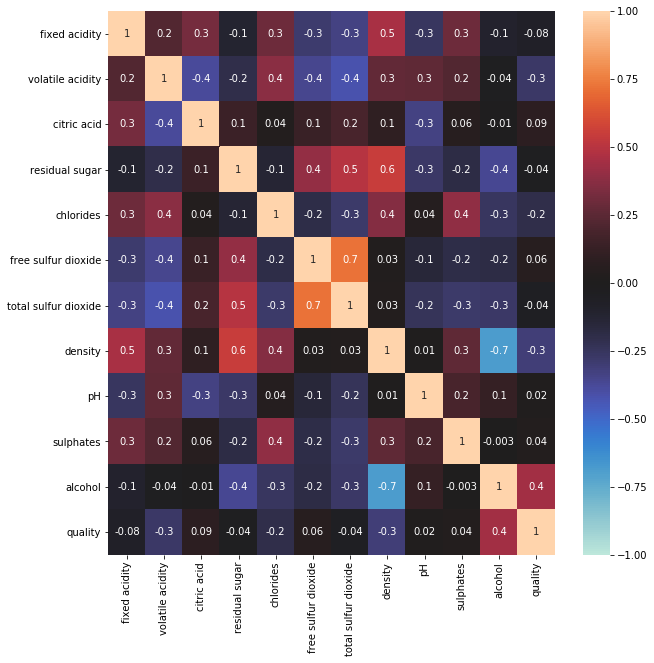

In [33]:
visualize(wine)

## Predicting Missing Values
#### As you can see that our data do not contain any missing values. So, we are going to simulate missing value scenairo but randomly removing some data values.

In [34]:
data = wine.values.tolist()
train = data[:5000]
test = data[5000:]

In [38]:
def estimate_error_mean_mode(new_df, num_var, folds = 5, missing_ratio= 0.1):
    num_error = {}
    for i in num_var:
        #Removing missing data
        data = new_df[i].dropna().reset_index(drop = True)
        #Scaling the data
        minimum = min(data)
        maximum = max(data)
        transformed = (data - minimum) / (maximum - minimum)
        org = transformed.copy()
        error_temp = []
        #Doings folds to get average error
        for j in range(folds):
            sample_index = random.sample(list(data.index), math.floor(missing_ratio * len(data)))
            transformed[sample_index] = np.nan
            transformed = transformed.fillna(transformed.mean())
            error_temp.append(np.sum((org - transformed)**2)/len(sample_index))
        num_error[i] = sum(error_temp)/folds


    print("Numeric attributes imputation error : ", sum(num_error.values()))
    return num_error

In [40]:
errors = estimate_error_mean_mode(wine , num_var = wine.columns, folds = 5, missing_ratio= 0.1)

Numeric attributes imputation error :  0.3581250232716215


In [55]:
def visualizeError(errors):
    x = []
    y = []

    for k, v in errors.items():
        x.append(k)
        y.append(v)
    plt.figure(figsize = (20, 5))
    sns.barplot(x=x, y=y)
    plt.show()

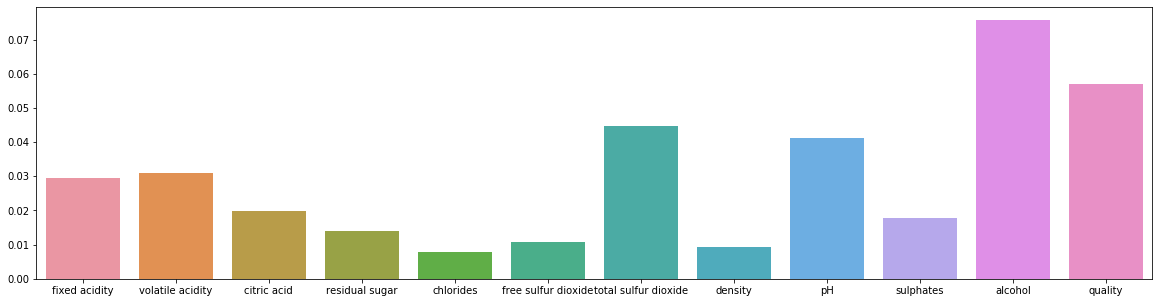

In [56]:
visualizeError(errors)